In [1]:
# matplotlib 世界高峰数据可视化

   Rank                                  Mountain  Height (m)  Height (ft)  \
0     1  Mount Everest / Sagarmatha / Chomolungma        8848        29029   
1     2                K2 / Qogir / Godwin Austen        8611        28251   
2     3                             Kangchenjunga        8586        28169   
3     4                                    Lhotse        8516        27940   
4     5                                    Makalu        8485        27838   

   Prominence (m)                   Range              Coordinates  \
0            8848     Mahalangur Himalaya  27°59′17″N 86°55′31″E﻿    
1            4017       Baltoro Karakoram  35°52′53″N 76°30′48″E﻿    
2            3922  Kangchenjunga Himalaya  27°42′12″N 88°08′51″E﻿    
3             610     Mahalangur Himalaya  27°57′42″N 86°55′59″E﻿    
4            2386     Mahalangur Himalaya  27°53′23″N 87°05′20″E﻿    

  Parent mountain First ascent Ascents bef. 2004  Failed attempts bef. 2004  
0             NaN         1953  

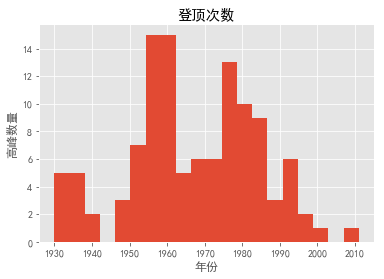

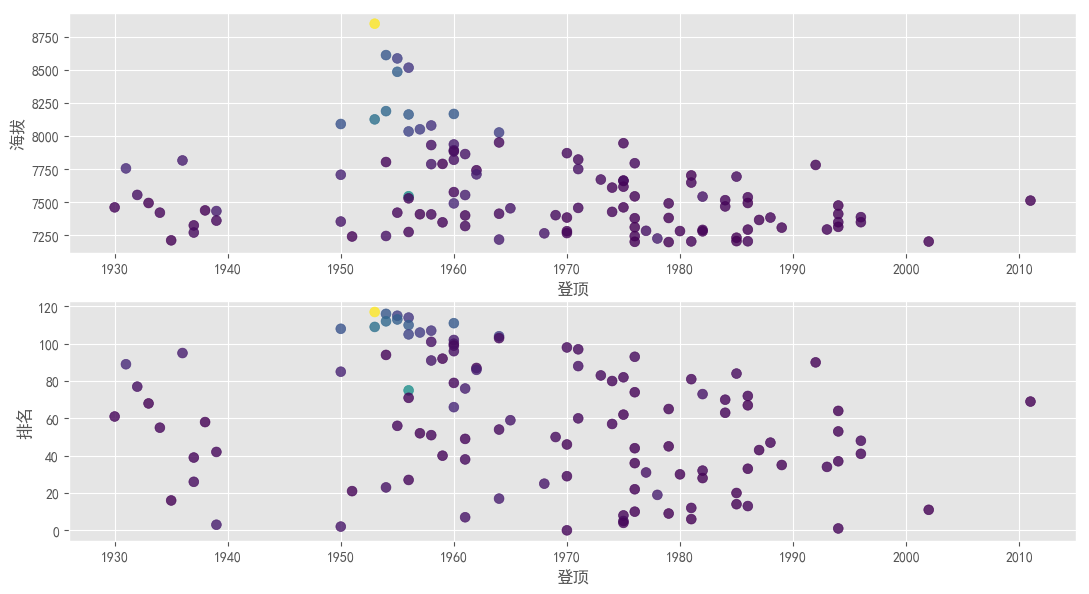

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')     # 设置图片显示的主题样式

# 解决matplotlib显示中文问题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

# dataset_path = './dataset/Mountains.csv'
dataset_path = './Mountains.csv'


def preview_data(data):
    """
        数据预览
    """
    # 数据预览
    print(data.head())

    # 数据信息
    print(data.info())


def proc_success(val):
    """
        处理 'Ascents bef. 2004' 列中的数据
    """
    if '>' in str(val):
        return 200
    elif 'Many' in str(val):
        return 160
    else:
        return val


def run_main():
    """
        主函数
    """
    data = pd.read_csv(dataset_path)

    preview_data(data)

    # 数据重构
    # 重命名列名
    data.rename(columns={'Height (m)': 'Height', 'Ascents bef. 2004': 'Success',
                         'Failed attempts bef. 2004': 'Failed'}, inplace=True)

    # 数据清洗
    data['Failed'] = data['Failed'].fillna(0).astype(int)
    data['Success'] = data['Success'].apply(proc_success)
    data['Success'] = data['Success'].fillna(0).astype(int)
    data = data[data['First ascent'] != 'unclimbed']
    data['First ascent'] = data['First ascent'].astype(int)

    # 可视化数据
    # 1. 登顶次数 vs 年份
    plt.hist(data['First ascent'].astype(int), bins=20)
    plt.ylabel('高峰数量')
    plt.xlabel('年份')
    plt.title('登顶次数')
    plt.savefig('./first_ascent_vs_year.png')
    plt.show()


    # 2. 登顶海拔 vs 排名
    data['Attempts'] = data['Failed'] + data['Success']  # 攀登尝试次数
    fig = plt.figure(figsize=(13, 7), dpi=100)

    fig.add_subplot(211)
    plt.scatter(data['First ascent'], data['Height'], c=data['Attempts'], alpha=0.8, s=50)
    plt.ylabel('海拔')
    plt.xlabel('登顶')

    fig.add_subplot(212)
    plt.scatter(data['First ascent'], data['Rank'].max() - data['Rank'], c=data['Attempts'], alpha=0.8, s=50)
    plt.ylabel('排名')
    plt.xlabel('登顶')
    plt.savefig('./mountain_vs_attempts.png')
    plt.show()

    # 课后练习，尝试使用seaborn或者bokeh重现上述显示的结果

if __name__ == '__main__':
    run_main()